# **Data Cleansing 🔥**

> Business Class

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

### คัดข้อมูลเฉพาะ bussiness class ออกมาจากข้อมูล

In [41]:
df_train = pd.read_csv("../../datasets/train.csv")
df_test = pd.read_csv("../../datasets/test.csv")

# รวมข้อมูล
df = pd.concat([df_train, df_test], ignore_index=True)
df_copy = df.copy()
business_df = df_copy[(df_copy['Class'] == 'Business')]

In [42]:
business_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             170
satisfaction    

### ดูความ balance ของข้อมูล

Text(0.5, 1.0, 'Quantity of each target')

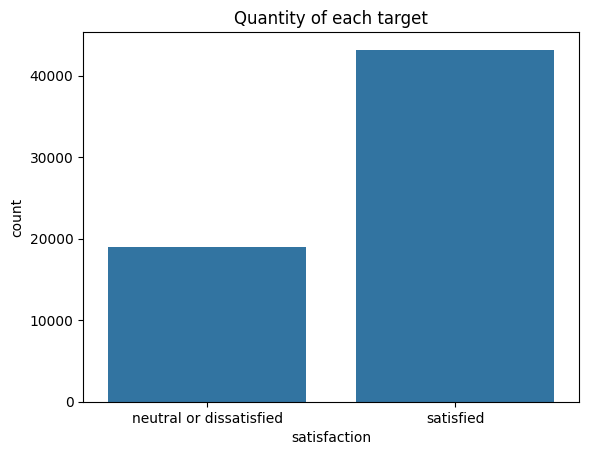

In [43]:
sns.countplot(x="satisfaction", data=business_df)
plt.title("Quantity of each target")

จะเห็นได้ว่า data มีความ imbalance ครึ่งต่อครึ่งเลย ทำให้เราต้องใช้หลัก oversampling + undersampling เพื่อแก้ปัญหานี้ นั่นคือการใช้ SMOTE นั่นเอง ซึ่งก่อนแก้ปัญหานี้ ต้องทำการ transform data ก่อน

### ตัด missing data ออก เพราะมีแค่ส่วนน้อย (หลักร้อยจากหมื่น)

In [44]:
business_df_dropNA = business_df.dropna()
business_df_dropNA

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,25967,90347,Female,disloyal Customer,39,Business travel,Business,404,1,1,...,2,5,3,4,4,4,2,0,0.0,neutral or dissatisfied
129873,25969,120654,Male,Loyal Customer,52,Business travel,Business,280,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied


### ตัด feature ที่ไม่จำเป็นออก

In [45]:
business_df_dropFetures=business_df_dropNA.drop(['Unnamed: 0','id', 'Gate location', 'Gender', 'Departure/Arrival time convenient', 'Arrival Delay in Minutes'],axis=1).reset_index(drop=True)
business_df_dropFetures

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
1,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
2,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
3,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
4,Loyal Customer,52,Business travel,Business,2035,4,4,5,5,5,5,5,5,5,4,5,4,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61985,disloyal Customer,39,Business travel,Business,404,1,1,2,1,2,2,5,3,4,4,4,2,0,neutral or dissatisfied
61986,Loyal Customer,52,Business travel,Business,280,3,3,3,4,4,4,4,4,4,3,4,3,0,satisfied
61987,disloyal Customer,34,Business travel,Business,526,3,3,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
61988,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied


### ตัด outliers

In [46]:
# Example: Remove outliers in 'column1' and 'column2' using IQR for both columns
Q1_col1 = business_df_dropFetures['Flight Distance'].quantile(0.25)
Q3_col1 = business_df_dropFetures['Flight Distance'].quantile(0.75)
IQR_col1 = Q3_col1 - Q1_col1

Q1_col2 = business_df_dropFetures['Departure Delay in Minutes'].quantile(0.25)
Q3_col2 = business_df_dropFetures['Departure Delay in Minutes'].quantile(0.75)
IQR_col2 = Q3_col2 - Q1_col2

lower_bound_col1 = Q1_col1 - 1.5 * IQR_col1
upper_bound_col1 = Q3_col1 + 1.5 * IQR_col1

lower_bound_col2 = Q1_col2 - 1.5 * IQR_col2
upper_bound_col2 = Q3_col2 + 1.5 * IQR_col2

df_no_outliers = business_df_dropFetures[(business_df_dropFetures['Flight Distance'] >= lower_bound_col1) & (business_df_dropFetures['Flight Distance'] <= upper_bound_col1) &
                    (business_df_dropFetures['Departure Delay in Minutes'] >= lower_bound_col2) & (business_df_dropFetures['Departure Delay in Minutes'] <= upper_bound_col2)]
df_no_outliers
df_cleaned = df_no_outliers
print(df_no_outliers.shape)

(53719, 19)


### Encode object features

In [47]:
encoded_need=[]
for i in df_cleaned.columns:
  if df_cleaned[i].dtype=='object':
    print(f"Unique values of '{i}' is {df_cleaned[i].unique()}")
    encoded_need.append(i)
print("Categorical values exist in the columns : ",encoded_need)
encoded_need = encoded_need[:-1]
print(encoded_need)

Unique values of 'Customer Type' is ['disloyal Customer' 'Loyal Customer']
Unique values of 'Type of Travel' is ['Business travel' 'Personal Travel']
Unique values of 'Class' is ['Business']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']
Categorical values exist in the columns :  ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['Customer Type', 'Type of Travel', 'Class']


In [48]:
max_values = df_cleaned.max()
# min_values = df_cleaned.min()

# Find columns where max = 5
columns_with_max_5 = max_values[max_values == 5].index.tolist()

print("คอลัมน์ที่มีค่า max เท่ากับ 5:", columns_with_max_5)

# Concatenate the lists
encoded_all = columns_with_max_5 + encoded_need
print(encoded_all)
print(len(encoded_all))

คอลัมน์ที่มีค่า max เท่ากับ 5: ['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Customer Type', 'Type of Travel', 'Class']
15


In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(df_cleaned[encoded_all])

df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(encoded_all))
df_encoded = df_encoded.astype(int)
print(list(df_encoded))
df_encoded

['Inflight wifi service_0', 'Inflight wifi service_1', 'Inflight wifi service_2', 'Inflight wifi service_3', 'Inflight wifi service_4', 'Inflight wifi service_5', 'Ease of Online booking_0', 'Ease of Online booking_1', 'Ease of Online booking_2', 'Ease of Online booking_3', 'Ease of Online booking_4', 'Ease of Online booking_5', 'Food and drink_0', 'Food and drink_1', 'Food and drink_2', 'Food and drink_3', 'Food and drink_4', 'Food and drink_5', 'Online boarding_0', 'Online boarding_1', 'Online boarding_2', 'Online boarding_3', 'Online boarding_4', 'Online boarding_5', 'Seat comfort_1', 'Seat comfort_2', 'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5', 'Inflight entertainment_0', 'Inflight entertainment_1', 'Inflight entertainment_2', 'Inflight entertainment_3', 'Inflight entertainment_4', 'Inflight entertainment_5', 'On-board service_0', 'On-board service_1', 'On-board service_2', 'On-board service_3', 'On-board service_4', 'On-board service_5', 'Leg room service_0', 'Leg room s

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business
0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,1
53715,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
53716,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,1
53717,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [50]:
df_drop_dummy = df_cleaned.drop(encoded_all, axis=1)
df_drop_dummy

,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,25,235,1,neutral or dissatisfied
1,26,1142,0,satisfied
2,25,562,11,neutral or dissatisfied
3,61,214,0,satisfied
4,52,2035,4,satisfied
...,...,...,...,...
61985,39,404,0,neutral or dissatisfied
61986,52,280,0,satisfied
61987,34,526,0,neutral or dissatisfied
61988,23,646,0,satisfied


In [51]:
# ตรวจสอบขนาดของ df_drop_dummy และ df_encoded ก่อน
print("ขนาดของ df_drop_dummy:", df_drop_dummy.shape)
print("ขนาดของ df_encoded:", df_encoded.shape)

df_drop_dummy_reset = df_drop_dummy.reset_index(drop=True)
df_encoded_reset = df_encoded.reset_index(drop=True)

df_final = pd.concat([df_encoded_reset, df_drop_dummy_reset], axis=1)

# df_final = pd.concat([df_encoded, df_drop_dummy], axis=1)
print("ขนาดของ df_final:", df_final.shape)

ขนาดของ df_drop_dummy: (53719, 4)
ขนาดของ df_encoded: (53719, 74)
ขนาดของ df_final: (53719, 78)


In [52]:
df_final

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,39,404,0,neutral or dissatisfied
53715,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,52,280,0,satisfied
53716,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,34,526,0,neutral or dissatisfied
53717,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,23,646,0,satisfied


Text(0.5, 1.0, 'Quantity of each target')

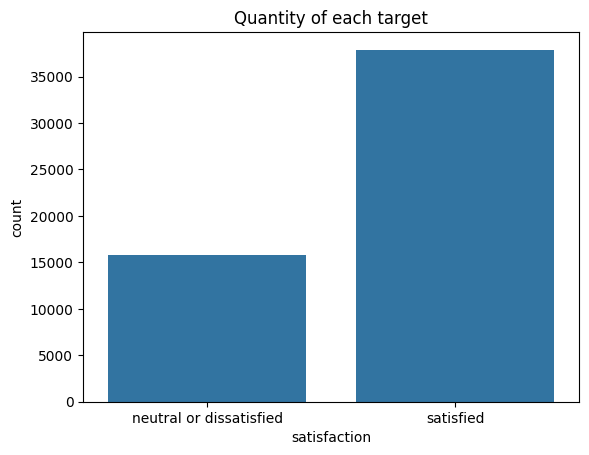

In [53]:
sns.countplot(x="satisfaction", data=df_final)
plt.title("Quantity of each target")

### แบ่งข้อมูลเป็น X กับ Y

In [54]:
X = df_final.iloc[:,:-1]
Y = df_final["satisfaction"]

In [55]:
print('Before', Counter(Y))

# Oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X, Y)

# Convert the resampled arrays back to DataFrames
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)  # Use the original columns
y_train_smote_df = pd.Series(y_train_smote, name='satisfaction')  # Create a Series for the target variable

# Combine features and target into a single DataFrame
df_final_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

# Check the class distribution after SMOTE
counter = Counter(y_train_smote)
print('After', counter)

df_final_smote


Before Counter({'satisfied': 37890, 'neutral or dissatisfied': 15829})
After Counter({'neutral or dissatisfied': 37890, 'satisfied': 37890})


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,55,1440,0,neutral or dissatisfied
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,32,326,0,neutral or dissatisfied
75777,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,49,2435,0,neutral or dissatisfied
75778,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,41,192,0,neutral or dissatisfied


Text(0.5, 1.0, 'Quantity of each target')

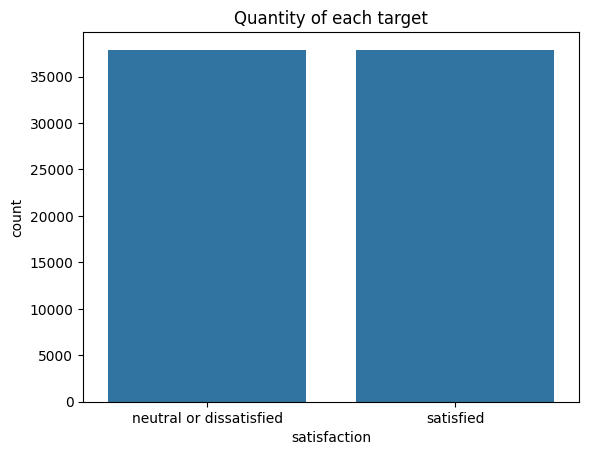

In [56]:
sns.countplot(x="satisfaction", data=df_final_smote)
plt.title("Quantity of each target")

### Save Cleaned Data

In [57]:
df_final_smote.to_csv('../../datasets/data_transformed_business.csv', index=False)

### Save Encoder

In [58]:
import pickle
with open('../../pipelines/encoder_business.pkl', 'wb') as f:
    pickle.dump(encoder, f)